In [1]:
#Data hosted in below link(download it)
! wget https://www.dropbox.com/s/tlxserrdhe240lu/archive.zip

--2021-09-12 05:43:50--  https://www.dropbox.com/s/tlxserrdhe240lu/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tlxserrdhe240lu/archive.zip [following]
--2021-09-12 05:43:50--  https://www.dropbox.com/s/raw/tlxserrdhe240lu/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2875a2f2ffbcdd0d1aef640569.dl.dropboxusercontent.com/cd/0/inline/BWDGmHatBACdRLMIKkY9kaEavoN3kqjkKd16g76n0NWLzs-jHh4oM9Jnak0FQ8uWZsfZYyMwffs0KskN9iYk2v9FLMbycUkniH6CYaUaZRfG8I6lqhqjjtNVn5q8SCPcfIznljGdR40ZKRozc2VCmF5c/file# [following]
--2021-09-12 05:43:51--  https://uc2875a2f2ffbcdd0d1aef640569.dl.dropboxusercontent.com/cd/0/inline/BWDGmHatBACdRLMIKkY9kaEavoN3kqjkKd16g76n0NWLzs-jHh4oM9Jnak0FQ8uWZsfZYyMwffs0KskN9iYk2v9FLM

In [2]:
#Unzip the files
! unzip -q "archive.zip"

In [3]:
#Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
#Creating pathlib Path objects/defining directories for train,validation,test set
train_path = Path("chest_xray/train/") 
validation_path= Path("chest_xray/val/")
test_path= Path("chest_xray/test/")

In [ ]:
#Define some often used parameters

# Collect Length for Training and Validation Datasets
train_dataset_length = len(train_image_paths)
val_dataset_length = len(val_image_paths)

#The batch refers to the number of training examples utilized in one iteration
batch_size = 32

#The dimension of the images we are going to define is 500x500 
img_height = 500
img_width = 500

#The dimension size of 500 or more than 500 with batch size greater than 16 may result in a crash as the RAM gets completely used in such cases. 
#A lower dimension size with greater batch size is one of the options to try.


In [7]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )

# Create Image Data Generator which is object of tensorflow, for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)
valid_data_gen=ImageDataGenerator(rescale=1./255)

In [8]:
#Loading the Images 
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      validation_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


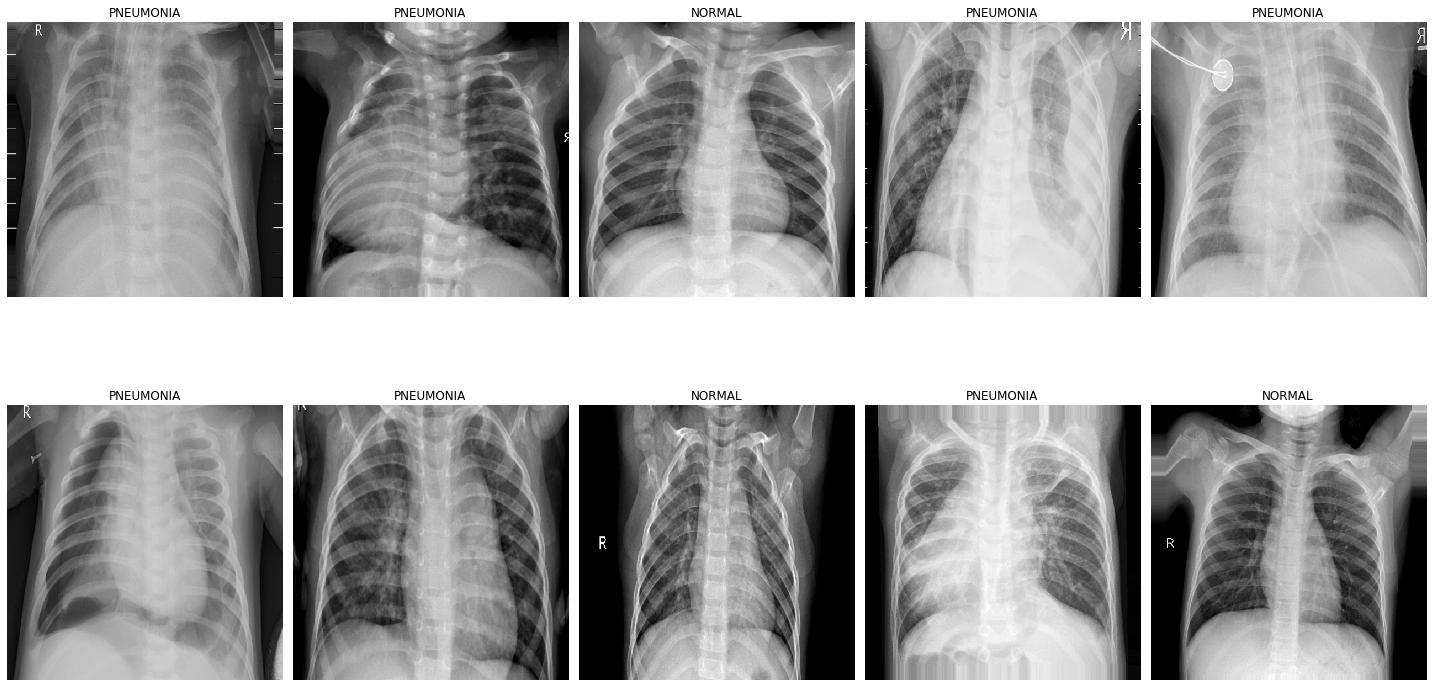

In [14]:
#Data visualization of the train set images that we obtained from the Data Augmentation

plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [10]:
#CNN for detecting patterns in images and various other uses
#Import the Necessary Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau




In [17]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))


cnn.add(Flatten())


cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))


cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 58, 58, 64)       

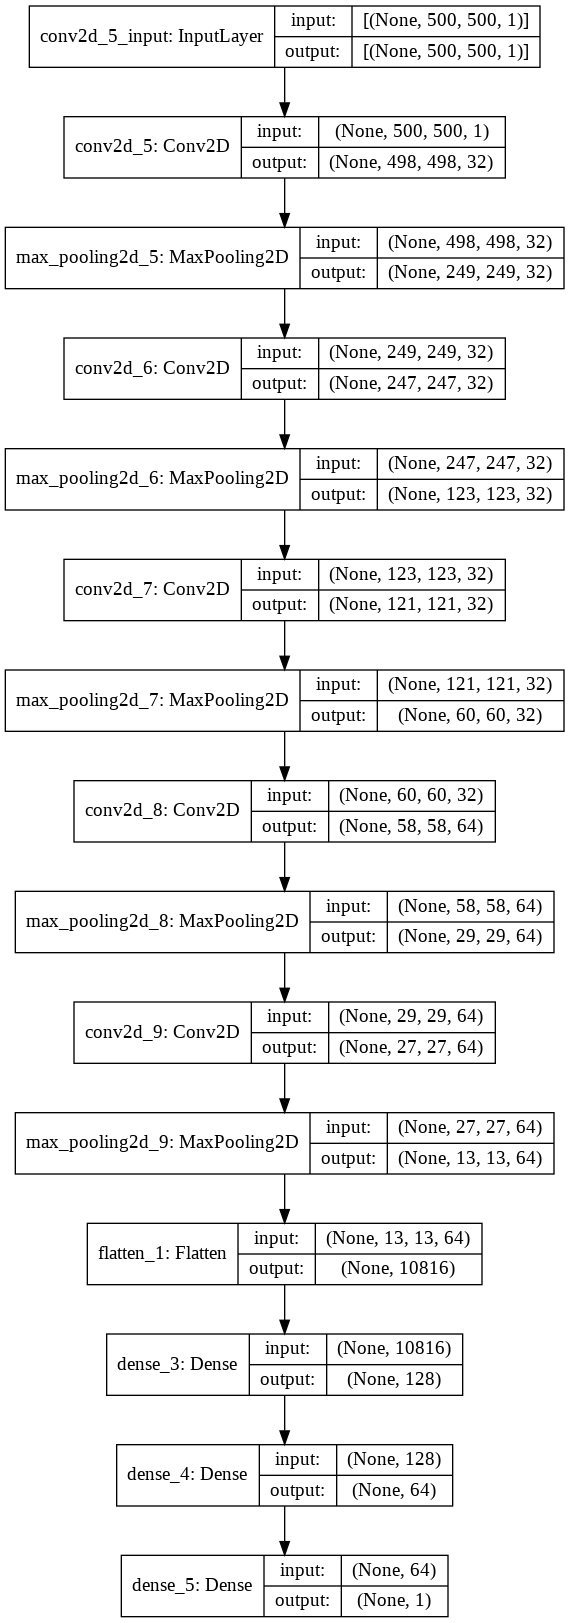

In [19]:
#Visualize CNN model
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [20]:
#EarlyStopping is called to stop the epochs based on some metric(monitor) and conditions (mode, patience) . It helps to avoid overfitting the model.

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [21]:
#Assigning Class Weights to each class
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.9448173005219984, 1: 0.6730322580645162}


In [22]:
#Training
cnn.fit(train,epochs=25, 
        validation_data=valid, 
        class_weight=cw, 
        callbacks=callbacks_list)

Epoch 1/25
326/326 [==============================] - 178s 458ms/step - loss: 0.3833 - accuracy: 0.8039 - val_loss: 0.6302 - val_accuracy: 0.7500
Epoch 2/25
326/326 [==============================] - 147s 450ms/step - loss: 0.2452 - accuracy: 0.9011 - val_loss: 0.6216 - val_accuracy: 0.6875
Epoch 3/25
326/326 [==============================] - 146s 447ms/step - loss: 0.1771 - accuracy: 0.9302 - val_loss: 0.4189 - val_accuracy: 0.8750
Epoch 4/25
326/326 [==============================] - 150s 459ms/step - loss: 0.1804 - accuracy: 0.9317 - val_loss: 0.5590 - val_accuracy: 0.6875
Epoch 5/25
326/326 [==============================] - 153s 470ms/step - loss: 0.1781 - accuracy: 0.9293 - val_loss: 0.3434 - val_accuracy: 0.7500
Epoch 6/25
326/326 [==============================] - 153s 467ms/step - loss: 0.1617 - accuracy: 0.9381 - val_loss: 0.5102 - val_accuracy: 0.6875
Epoch 7/25
326/326 [==============================] - 153s 468ms/step - loss: 0.1564 - accuracy: 0.9396 - val_loss: 0.9671 -

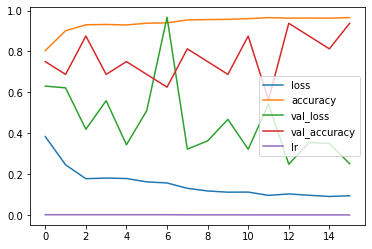

In [23]:
#Evaluation
#Let’s visualize the progress of all metrics throughout the total epochs lifetime
pd.DataFrame(cnn.history.history).plot()

In [24]:
#To check the accuracy percentage
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 7s 169ms/step - loss: 0.2641 - accuracy: 0.9135
The testing accuracy is : 91.34615659713745 %


In [25]:
#To predict the test dataset #not necessary
preds = cnn.predict(test,verbose=1)

39/39 [==============================] - 6s 144ms/step


In [26]:
#We have used sigmoid activation function in last layer so range will from 0 to 1 and not exactly as 0 or 1
#So categorise all the values in the 0.5 to 1 range as 0 and less than 0.5 as 1
#0 - Normal and 1 - pneumonia
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

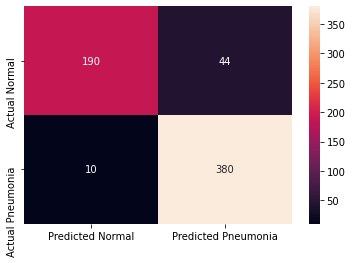

In [28]:
#To get confusion matrix for our model

from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])

import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [29]:
#Report
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.95      0.81      0.88       234
   PNEUMONIA       0.90      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.92      0.91      0.91       624



(624, 500, 500, 1)
(624,)


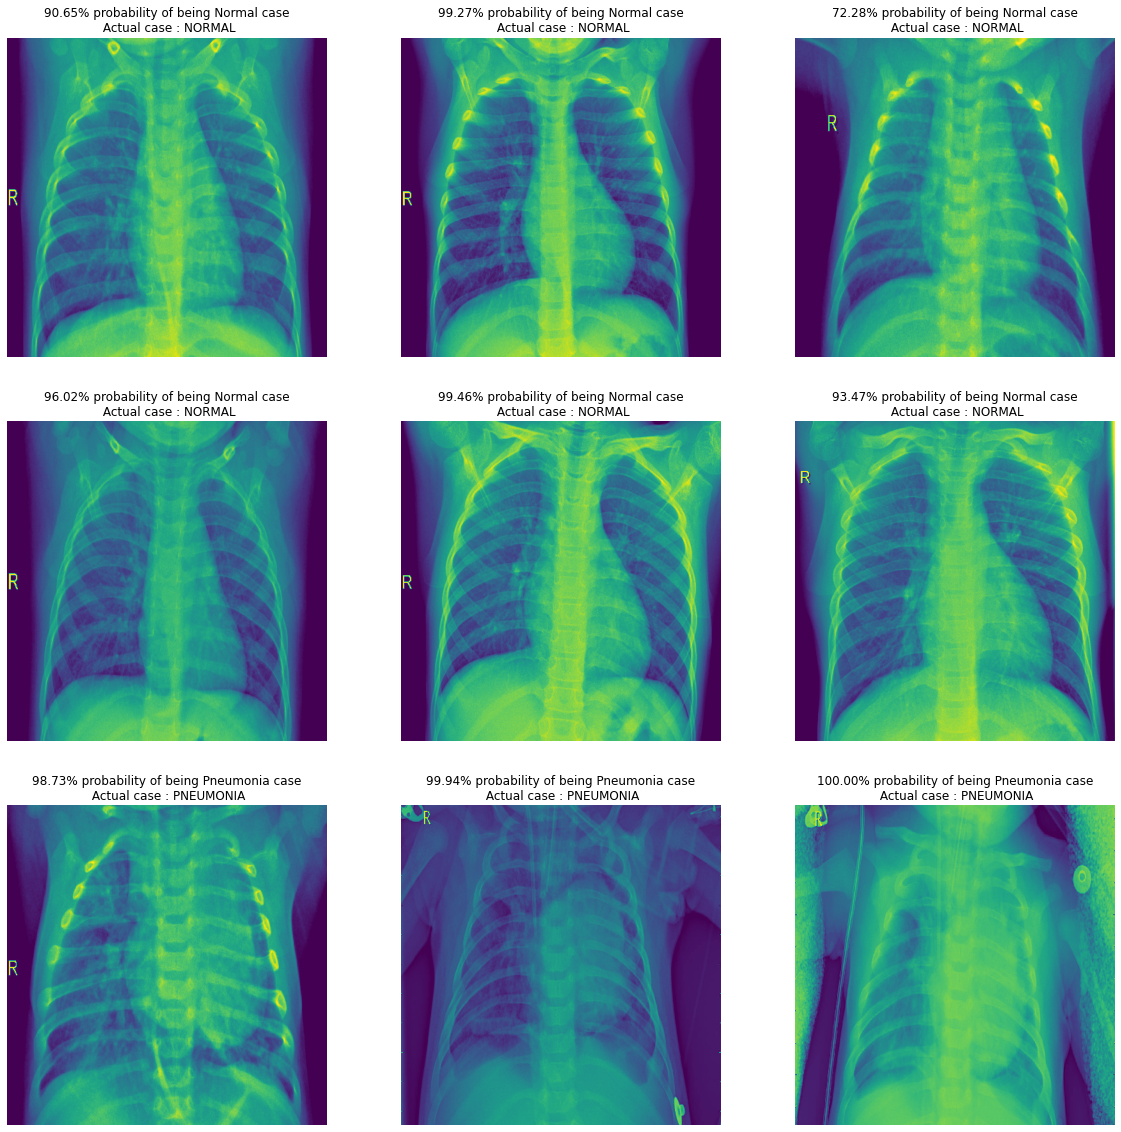

In [30]:
#Predictions on test data with percentage
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)
#this little code above extracts the images from test Data iterator without shuffling the sequence
# x contains image array and y has labels 
dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()